<center><b>In the name of God</b></center>

<b>Course</b>: Machine Learning
<br>
<b>Description:</b> HomeWork 2 | Question 2
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

In [84]:
# Import Allowed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

https://gitlab.com/aut-data-mining/titanic/

In [72]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [73]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Preprocess

In [74]:
def show_null_value_status():
    """ Specify number of null value in data set """
    print(data_train.isnull().value_counts())
    print(data_test.isnull().value_counts())

In [75]:
# Kill Killer features :)
del data_train["PassengerId"]
del data_train["Name"]
del data_train["Cabin"]
del data_train["Ticket"]

del data_test["PassengerId"]
del data_test["Name"]
del data_test["Cabin"]
del data_test["Ticket"]

show_null_value_status()

Survived  Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False     False   False  False  False  False  False  False       712
                         True   False  False  False  False       177
                         False  False  False  False  True          2
dtype: int64
Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       331
               True   False  False  False  False        86
               False  False  False  True   False         1
dtype: int64


In [76]:
data_train = data_train.fillna(data_train.mean())
data_test = data_test.fillna(data_test.mean())

show_null_value_status()

Survived  Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False     False   False  False  False  False  False  False       889
                                                     True          2
dtype: int64
Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       418
dtype: int64


In [77]:
# The number of data with null value is very small. suppose "Q" for them!
data_train["Embarked"] = data_train["Embarked"].fillna("Q")

show_null_value_status()

Survived  Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False     False   False  False  False  False  False  False       891
dtype: int64
Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       418
dtype: int64


In [78]:
# convert text value to integer value in column "Sex"
data_train["Sex"] = data_train["Sex"].apply(lambda x: +1 if x == "male" else -1)
data_test["Sex"] = data_test["Sex"].apply(lambda x: +1 if x == "male" else -1)

# Convert value to text value to  integer value
data_train["Embarked"] = data_train["Embarked"].apply(lambda x: 1 if x == "S" else (2 if x == "C" else 3))
data_test["Embarked"] = data_test["Embarked"].apply(lambda x: 1 if x == "S" else (2 if x == "C" else 3))

# Train and Validation Split

In [96]:
data_validation = data_train.head(int(len(data_train)*0.2))
data_train = data_train.tail(int(len(data_train)) - int(len(data_train)*0.2))

# Model

In [97]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

def create_decision_tree_model(data, max_depth, impurity_measure):
    """
    Create a classifier model with Decision tree approach
    
    LIBRARY: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

    :param data: prepared train data
    :param max_depth: the maximum depth of the tree
    :param impurity_measure: impurity measure for nodes of the tree
    :return: decision tree model
    """

    # Create Decision Tree classifier object
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=impurity_measure)

    # Specify X and Y
    x_train = data.drop(columns=["Survived"])
    y_train = data["Survived"]

    # Train Decision Tree Classier
    clf = clf.fit(x_train, y_train)

    return clf


In [98]:
def show_decision_tree(clf):
    """
    Show decision tree with visual format

    :param clf: model
    :return: nothing
    """

    plt.figure(figsize=(25, 10))
    plot_tree(clf,
              feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
              class_names='PassengerId',
              filled=True,
              rounded=True,
              fontsize=14)

    plt.show()

In [101]:
maxim_accuracy_validation = 0
best_clf = None

for max_depth in range(1, 20):
    for impurity_measure in ["gini", "entropy"]:
        clf = create_decision_tree_model(data_train, max_depth, impurity_measure)

        predicts = clf.predict(data_train.drop(columns=["Survived"]))
        accuracy_train = accuracy_score(data_train["Survived"], predicts)
        
        predicts = clf.predict(data_validation.drop(columns=["Survived"]))
        accuracy_validation = accuracy_score(data_validation["Survived"], predicts)
        
        if accuracy_validation > maxim_accuracy_validation:
            maxim_accuracy_validation = accuracy_validation
            best_clf = clf
        

In [102]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [103]:
maxim_accuracy_validation

0.8258426966292135

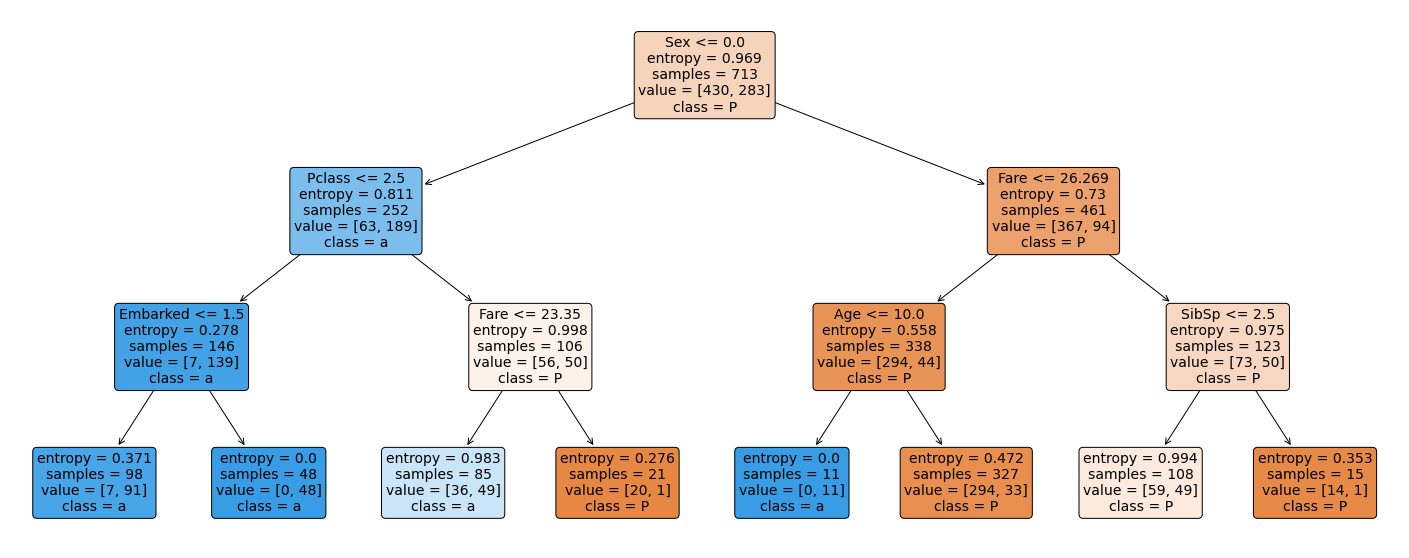

In [104]:
show_decision_tree(best_clf)